## Importing library

In [ ]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import *
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows",None)

### load data

In [ ]:
train_data=pd.read_csv("https://raw.githubusercontent.com/sazzad15-1779/Datasets/master/house-prices-advanced-regression-techniques/train.csv")
test_data= pd.read_csv("https://raw.githubusercontent.com/sazzad15-1779/Datasets/master/house-prices-advanced-regression-techniques/test.csv")

### get knowledge about data domain

In [ ]:
test_data.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

In [ ]:
train_data.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### defining categorical and numerical data separately

In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
categoric_data=train_data.select_dtypes(include="O").columns

In [ ]:
numeric_data=train_data.select_dtypes(include=["float","int"]).columns

## finding percentages

In [ ]:
train_data.count()/train_data.shape[0]*100   #showing not null value percentage

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
Street           100.000000
Alley              6.232877
LotShape         100.000000
LandContour      100.000000
Utilities        100.000000
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
Condition1       100.000000
Condition2       100.000000
BldgType         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
MasVnrType        99.452055
MasVnrArea        99.452055
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
BsmtQual          97.465753
BsmtCond          97.465753
BsmtExposure      97.397260
BsmtFinType1      97.465753
BsmtFinSF1       100.000000
BsmtFinType2      97

In [ ]:
test_data.isnull().sum()/test_data.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [ ]:
train_data[numeric_data].isnull().sum()/train_data.shape[0]*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

In [ ]:
train_data[categoric_data].isnull().sum()/train_data.shape[0]*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

## counting values 

In [ ]:
for col in categoric_data:
  print('null values =',train_data[col].isnull().sum())
  print(train_data[col].value_counts(), '\n')

null values = 0
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

null values = 0
Pave    1454
Grvl       6
Name: Street, dtype: int64 

null values = 1369
Grvl    50
Pave    41
Name: Alley, dtype: int64 

null values = 0
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

null values = 0
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

null values = 0
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

null values = 0
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

null values = 0
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

null values = 0
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      3

# showing grouping wise categorical relation


In [ ]:
train_data[train_data.MSZoning=="RL"] # showing all column which have relation with MSZoning RL value

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
5        6          50       RL  ...        WD         Normal    143000
6        7          20       RL  ...        WD         Normal    307000
7        8          60       RL  ...        WD         Normal    200000
9       10         190       RL  ...        WD         Normal    118000
10      11          20       RL  ...        WD         Normal    129500
11      12          60       RL  ...       New        Partial    345000
12      13          20       RL  ...        WD         Normal    144000
13      14          20       RL  ...       New        Partial    279500
14      15          20       RL  ...        WD         Normal    157000
16      17          20       RL  ...        WD         Normal    149000
17      18          90       RL  ...        WD         Normal     90000
18      19          20       RL  ...        WD         Normal    159000
19      20          20       RL  ...       COD        Abnorml    139000
20      21          60       RL  ...       New        Partial    325300
22      23          20       RL  ...        WD         Normal    230000
24      25          20       RL  ...        WD         Normal    154000
25      26          20       RL  ...        WD         Normal    256300
26      27          20       RL  ...        WD         Normal    134800
27      28          20       RL  ...        WD         Normal    306000
28      29          20       RL  ...        WD         Normal    207500
31      32          20       RL  ...        WD         Normal    149350
32      33          20       RL  ...        WD         Normal    179900
33      34          20       RL  ...        WD         Normal    165500
34      35         120       RL  ...        WD         Normal    277500
35      36          60       RL  ...        WD         Normal    309000
36      37          20       RL  ...        WD         Normal    145000
37      38          20       RL  ...        WD         Normal    153000
38      39          20       RL  ...        WD        Abnorml    109000
39      40          90       RL  ...        WD        AdjLand     82000
40      41          20       RL  ...        WD        Abnorml    160000
41      42          20       RL  ...        WD         Normal    170000
42      43          85       RL  ...        WD         Normal    144000
43      44          20       RL  ...        WD         Normal    130250
44      45          20       RL  ...        WD         Normal    141000
45      46         120       RL  ...        WD         Normal    319900
46      47          50       RL  ...        WD        Abnorml    239686
49      50          20       RL  ...        WD         Normal    127000
50      51          60       RL  ...        WD         Normal    177000
53      54          20       RL  ...        WD         Normal    385000
54      55          80       RL  ...        WD         Normal    130000
55      56          20       RL  ...        WD         Normal    180500
57      58          60       RL  ...        WD         Normal    196500
58      59          60       RL  ...       New        Partial    438780
59      60          20       RL  ...        WD         Normal    124900
60      61          20       RL  ...       New        Partial    158000
62      63         120       RL  ...        WD         Normal    202500
64      65          60       RL  ...        WD         Normal    219500
65      66          60       RL  ...        WD         Normal    317000
66      67          20       RL  ...        WD         Normal    180000
67      68          20       RL  ...        WD  

In [ ]:
# RL value relate to lotconfig 
train_data[train_data.MSZoning=="RL"].LotConfig.value_counts()

Inside     804
Corner     214
CulDSac     93
FR2         39
FR3          1
Name: LotConfig, dtype: int64

# visually relate features

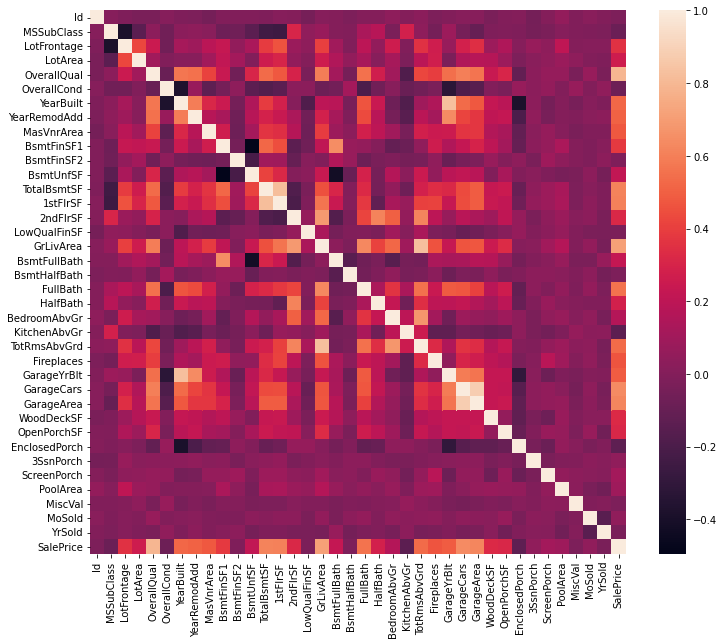

In [ ]:
#using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr())
plt.show()

In [ ]:
df_corr = train_data.corr()
cols = df_corr.nlargest(25, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch'],
      dtype='object')

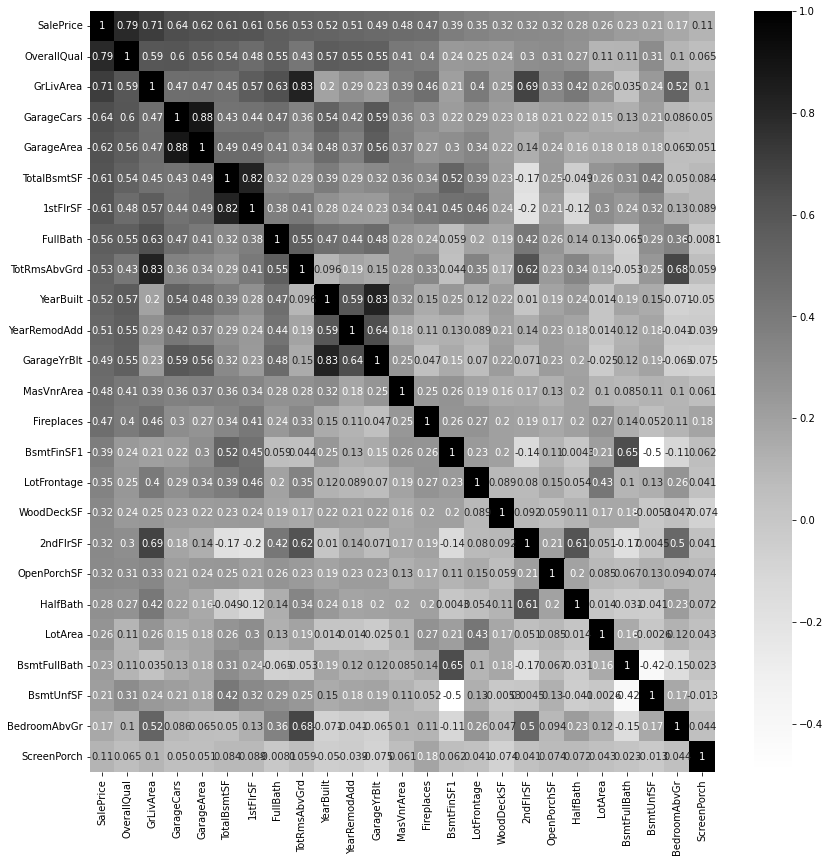

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(train_data[cols].corr(), cmap='Greys', annot=True)
plt.show()

# visualizing

Skewness of  SalePrice :  1.8828757597682129
Kurtosis of  SalePrice :  6.536281860064529
---------------------------
Skewness of  OverallQual :  0.2169439277628693
Kurtosis of  OverallQual :  0.09629277835615113
---------------------------
Skewness of  GrLivArea :  1.3665603560164552
Kurtosis of  GrLivArea :  4.895120580693174
---------------------------
Skewness of  GarageCars :  -0.3425489297486655
Kurtosis of  GarageCars :  0.22099776396532844
---------------------------
Skewness of  GarageArea :  0.17998090674623907
Kurtosis of  GarageArea :  0.9170672022708684
---------------------------
Skewness of  TotalBsmtSF :  1.5242545490627664
Kurtosis of  TotalBsmtSF :  13.250483281984796
---------------------------
Skewness of  1stFlrSF :  1.3767566220336365
Kurtosis of  1stFlrSF :  5.74584148244079
---------------------------
Skewness of  FullBath :  0.036561558402727165
Kurtosis of  FullBath :  -0.8570428212743262
---------------------------
Skewness of  TotRmsAbvGrd :  0.67634083643555

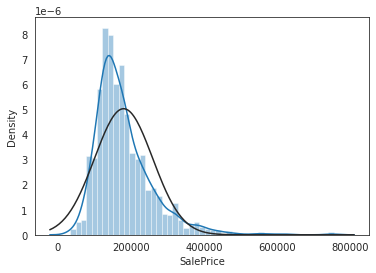

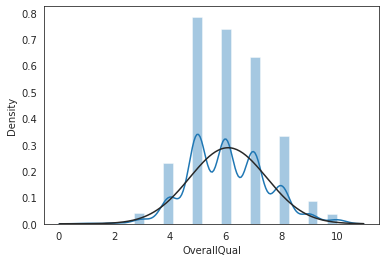

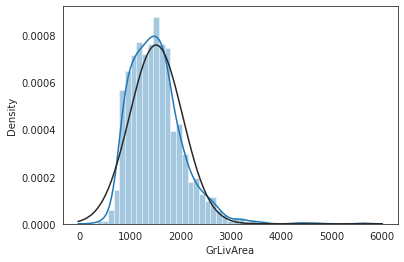

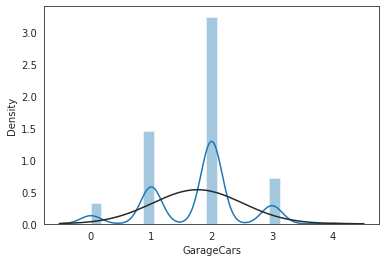

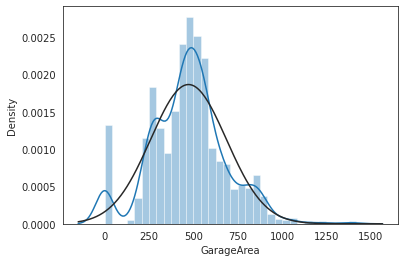

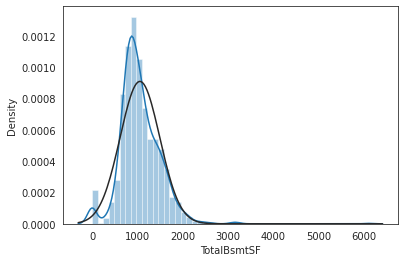

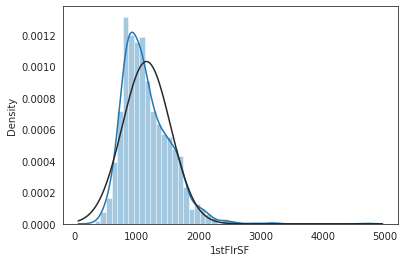

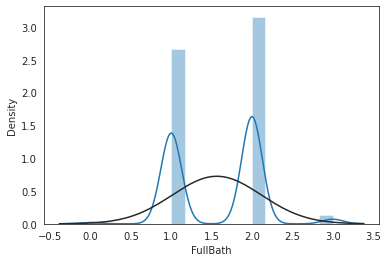

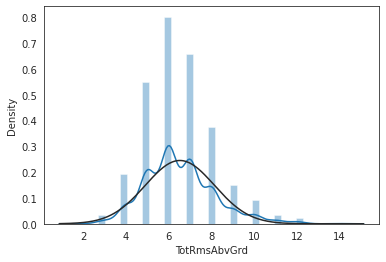

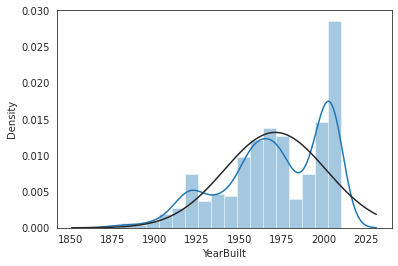

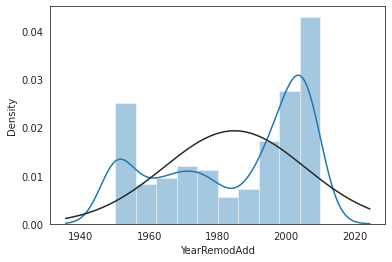

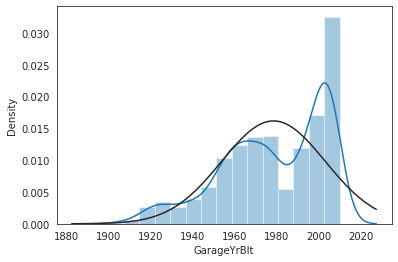

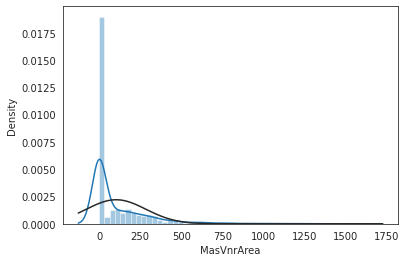

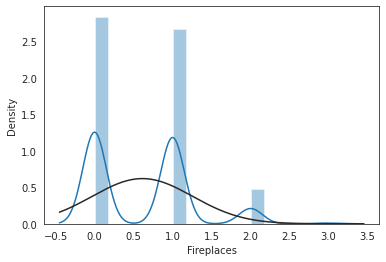

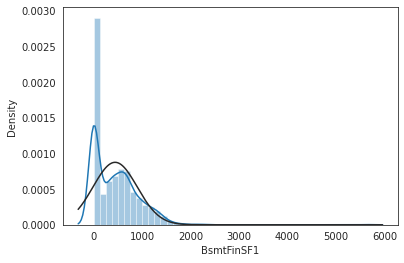

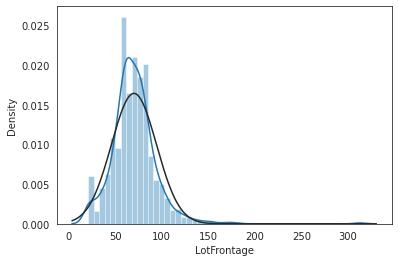

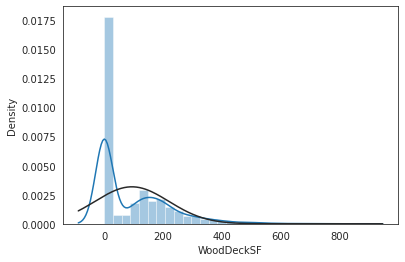

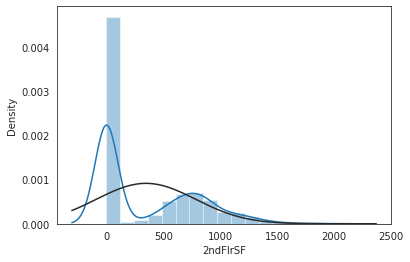

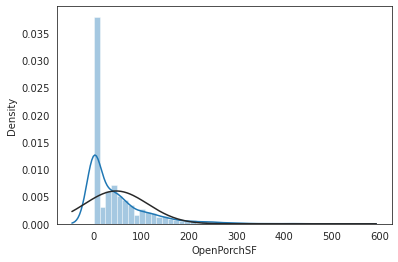

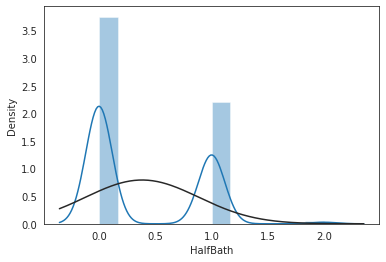

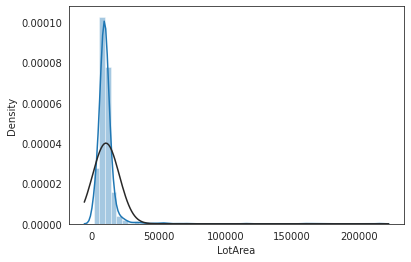

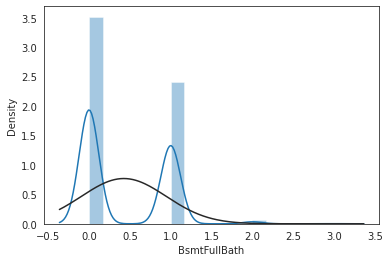

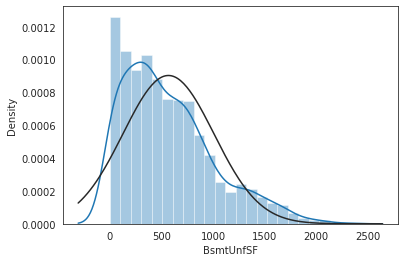

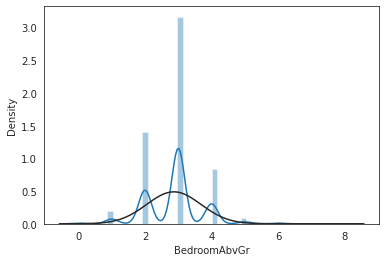

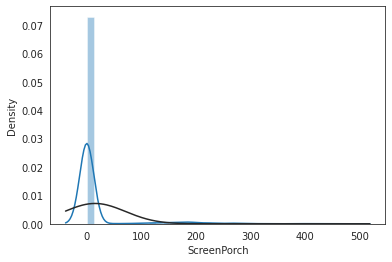

In [ ]:
for col in cols:
  print("Skewness of ", col,": " , train_data[col].skew())
  print("Kurtosis of ",col,": " , train_data[col].kurtosis())
  print("---------------------------")
  sns.set_style('white')
  plt.figure()
  sns.distplot(train_data[col],fit=norm)

 i can use boxplot https://www.kaggle.com/sylvainmartinez/kaggle-house-price-analysis

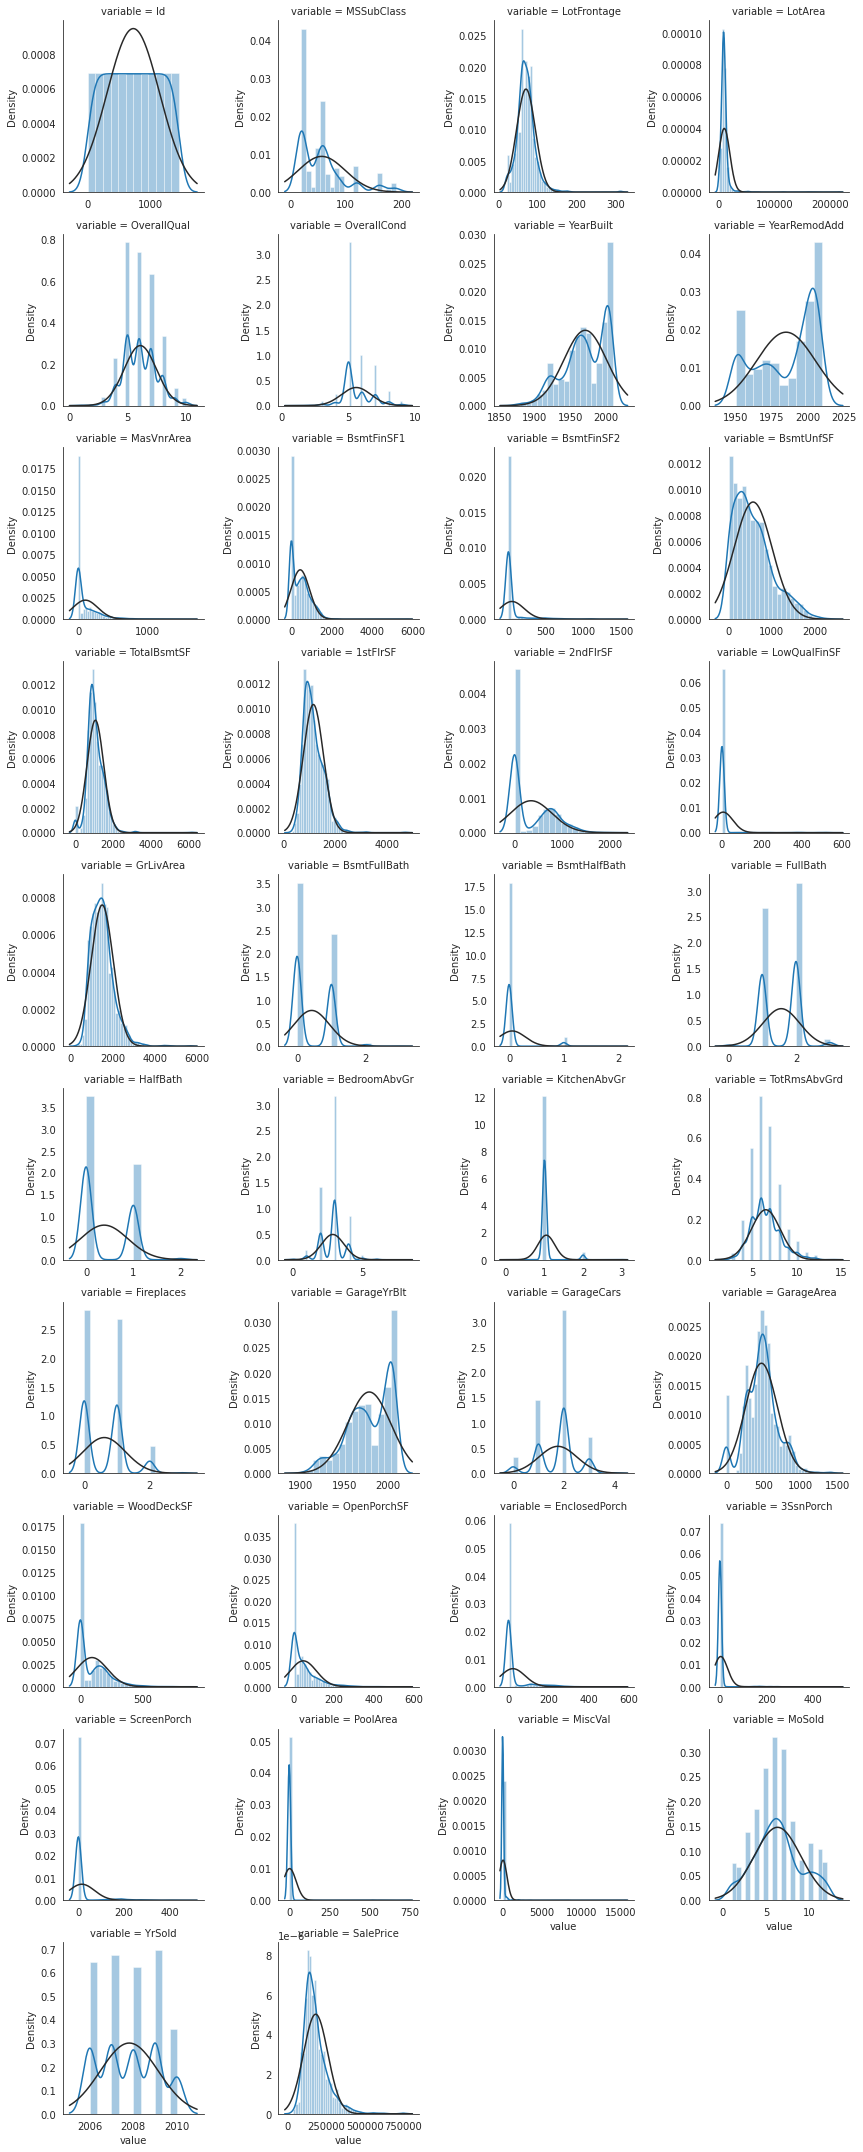

In [ ]:
# histogram for numerical data
f = pd.melt(train_data, value_vars = numeric_data)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x,fit=norm), 'value');


## Handling Missing Values

In [ ]:
null_columns=train_data.isnull().sum()/train_data.shape[0]*100
droping_cols=null_columns[null_columns>70].index
print(droping_cols)   #this columns have high null value 
# now drop from train and test data
train_data.drop(columns=droping_cols,axis=1,inplace=True)
test_data.drop(columns=droping_cols,axis=1,inplace=True)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [ ]:
train_data.shape,test_data.shape

((1460, 77), (1459, 76))

In [ ]:
null_columns=train_data.isnull().sum()/train_data.shape[0]*100
null_columns=null_columns[null_columns>0].index

In [ ]:
# finding datatypes of features which contain null value
object_cols=[]
numeric_cols=[]
for col in null_columns:
  print(col," = ",train_data[col].dtypes)
  if train_data[col].dtypes =='object':
    object_cols.append(col)
  else:
    numeric_cols.append(col)
print("\nobject columns \n",len(object_cols),"\nNumerical columns \n",len(numeric_cols))

LotFrontage  =  float64
MasVnrType  =  object
MasVnrArea  =  float64
BsmtQual  =  object
BsmtCond  =  object
BsmtExposure  =  object
BsmtFinType1  =  object
BsmtFinType2  =  object
Electrical  =  object
FireplaceQu  =  object
GarageType  =  object
GarageYrBlt  =  float64
GarageFinish  =  object
GarageQual  =  object
GarageCond  =  object

object columns 
 12 
Numerical columns 
 3


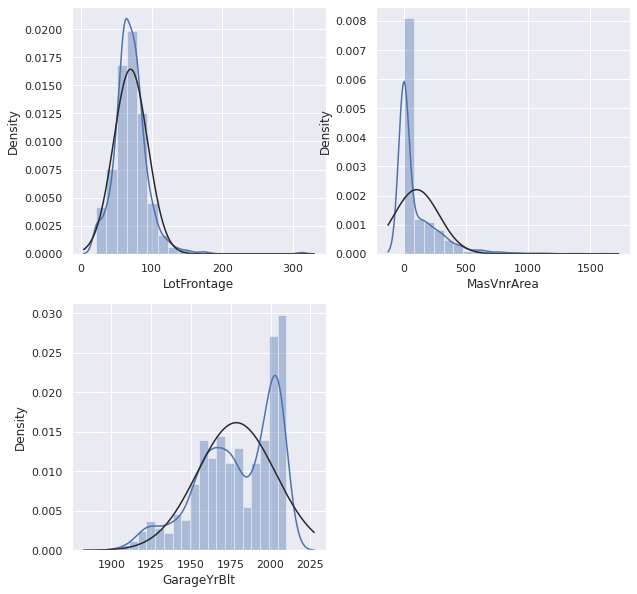

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
for i ,  var in enumerate(numeric_cols):
  plt.subplot(2,2,i+1)
  sns.distplot(train_data[var],fit=norm,bins=20)
  # LotFrontage's null value replace by mean because dataset is normal or bellcurve
  #null of MasVnrArea and GarageYrBlt replace by median because data set are skewed

In [ ]:
null_columns_test=test_data.isnull().sum()/test_data.shape[0]*100
null_columns_test=null_columns_test[null_columns_test>0].index

In [ ]:
# finding datatypes of features which contain null value of test dataset
object_cols_test=[]
numeric_cols_test=[]
for col in null_columns_test:
  print(col," = ",test_data[col].dtypes)
  if test_data[col].dtypes =='object':
    object_cols_test.append(col)
  else:
    numeric_cols_test.append(col)
print("\nobject columns \n",len(object_cols_test),"\nNumerical columns \n",len(numeric_cols_test))

MSZoning  =  object
LotFrontage  =  float64
Utilities  =  object
Exterior1st  =  object
Exterior2nd  =  object
MasVnrType  =  object
MasVnrArea  =  float64
BsmtQual  =  object
BsmtCond  =  object
BsmtExposure  =  object
BsmtFinType1  =  object
BsmtFinSF1  =  float64
BsmtFinType2  =  object
BsmtFinSF2  =  float64
BsmtUnfSF  =  float64
TotalBsmtSF  =  float64
BsmtFullBath  =  float64
BsmtHalfBath  =  float64
KitchenQual  =  object
Functional  =  object
FireplaceQu  =  object
GarageType  =  object
GarageYrBlt  =  float64
GarageFinish  =  object
GarageCars  =  float64
GarageArea  =  float64
GarageQual  =  object
GarageCond  =  object
SaleType  =  object

object columns 
 18 
Numerical columns 
 11


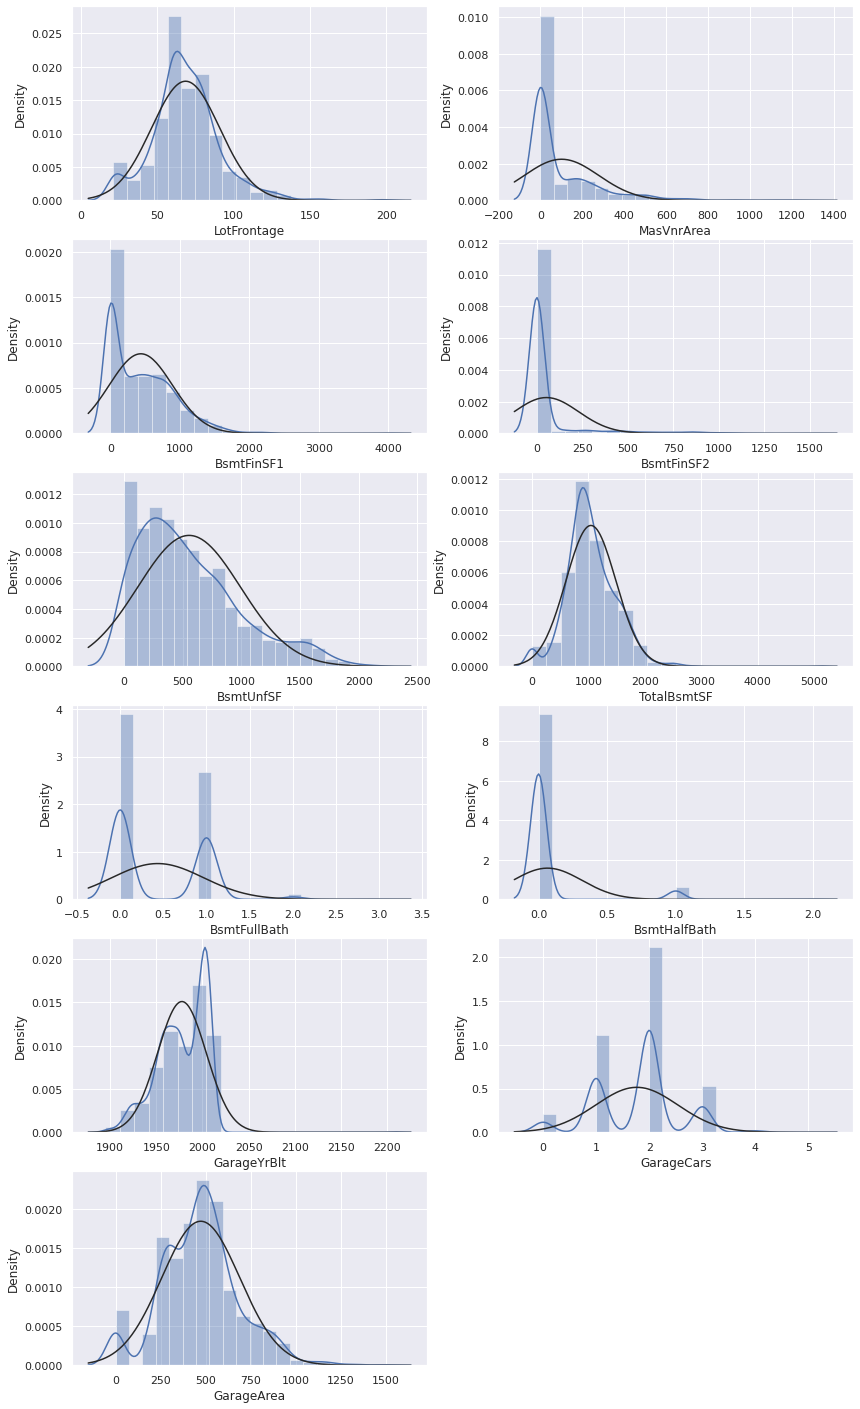

In [ ]:
sns.set()
plt.figure(figsize=(14,25))
for i ,  var in enumerate(numeric_cols_test):
  plt.subplot(6,2,i+1)
  sns.distplot(test_data[var],fit=norm,bins=20,label=var)


In [ ]:
# dealing with numerical values
train_data.fillna({
    'LotFrontage':train_data['LotFrontage'].mean(),
    'MasVnrArea':train_data['MasVnrArea'].median(), 
    'GarageYrBlt':train_data['GarageYrBlt'].median()
},inplace=True)

test_data.fillna({
    'LotFrontage':test_data['LotFrontage'].mean(),
    'TotalBsmtSF':test_data['GarageArea'].mean(),
    'GarageArea':test_data['GarageArea'].mean(),
    'BsmtFullBath':test_data['BsmtFullBath'].median(),
    'BsmtFinSF1':test_data['BsmtFinSF1'].median(), 
    'BsmtFinSF2':test_data['BsmtFinSF2'].median(), 
    'BsmtUnfSF':test_data['BsmtUnfSF'].median(), 
    'BsmtHalfBath':test_data['BsmtHalfBath'].median(),
    'GarageYrBlt':test_data['GarageYrBlt'].median(), 
    'MasVnrArea':test_data['MasVnrArea'].median(), 
    'GarageCars':test_data['GarageCars'].median(), 
    'GarageYrBlt':test_data['GarageYrBlt'].median()
},inplace=True)

In [ ]:
for col in object_cols:
  train_data[col].fillna(train_data[col].mode()[0],inplace=True)   #[0] important to fill categorical variable


In [ ]:
train_data.isnull().sum().sum()

0

In [ ]:
for col in object_cols_test:
  test_data[col].fillna(test_data[col].mode()[0],inplace=True)   #[0] important to fill categorical variable

In [ ]:
test_data.isnull().sum().sum(),train_data.isnull().sum().sum()

(0, 0)

In [ ]:
treatment_col=[]
test_cat_col=test_data.select_dtypes(include="O").columns
train_cat_col=train_data.select_dtypes(include="O").columns
for var in train_cat_col:
  if(len(test_data[var].value_counts())!=len(train_data[var].value_counts())):
    treatment_col.append(var)
treatment_col

['Utilities',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Heating',
 'Electrical',
 'GarageQual']

In [ ]:
for var in treatment_col:
  print("test:",test_data[var].value_counts(),"\n Total:",len(test_data[var].value_counts()))
  print("train:",train_data[var].value_counts(),"\n Total:",len(train_data[var].value_counts()))

test: AllPub    1459
Name: Utilities, dtype: int64 
 Total: 1
train: AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 
 Total: 2
test: Norm      1444
Feedr        7
Artery       3
PosA         3
PosN         2
Name: Condition2, dtype: int64 
 Total: 5
train: Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64 
 Total: 8
test: 1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64 
 Total: 7
train: 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64 
 Total: 8
test: CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64 
 Total: 4
train: CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, 

# work with outliers

1. boxplot
2. distplot
3. scatterplot
#### i can use groupby in barplot

In [ ]:
train_data.SalePrice = np.log(train_data.SalePrice)

In [ ]:
sns.set()
plt.figure(figsize=(10,150))
for i ,  var in enumerate(numeric_data):
  #plt.subplot(40,1,i+1)
  #sns.boxplot(train_data[var],train_data.SalePrice)
  pass


<Figure size 720x10800 with 0 Axes>

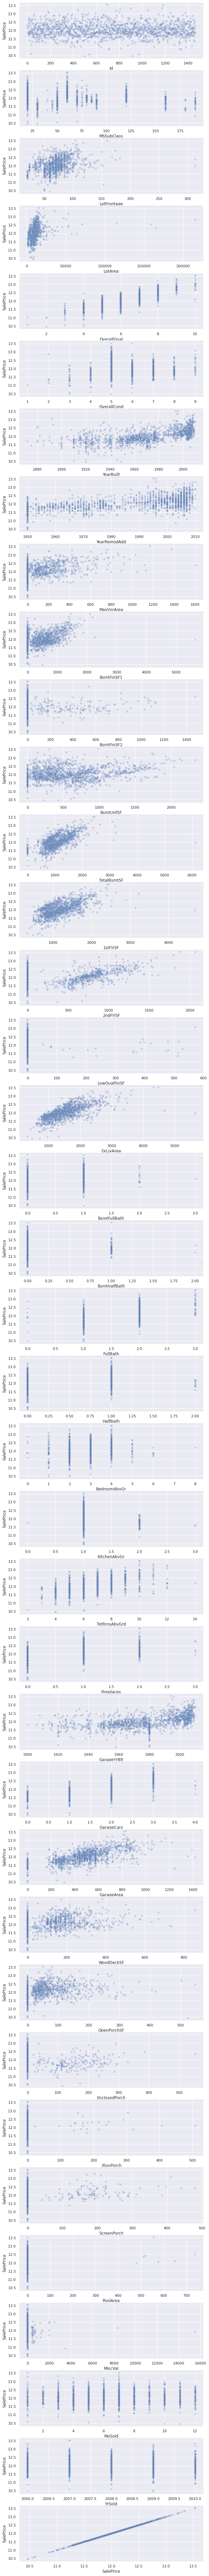

In [ ]:
sns.set()
plt.figure(figsize=(10,150))
for i ,  var in enumerate(numeric_data):
  plt.subplot(40,1,i+1)
  sns.scatterplot(x=train_data[var] , y=train_data['SalePrice'], alpha=0.25)


In [ ]:
train_data.drop(train_data[train_data['TotalBsmtSF']> 4000].index,inplace=True)

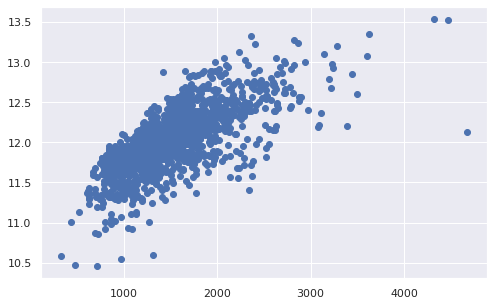

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(train_data.GrLivArea,train_data.SalePrice)

In [ ]:
train_data.drop(train_data[train_data['GrLivArea']> 5000].index,inplace=True)


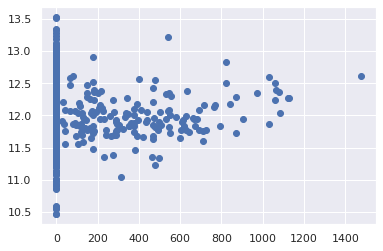

In [ ]:
plt.scatter(train_data.BsmtFinSF2,train_data.SalePrice)

In [ ]:
train_data.drop(train_data[train_data['BsmtFinSF2']> 1200].index,inplace=True)

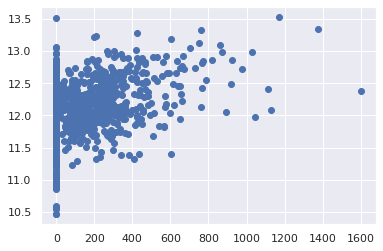

In [ ]:
plt.scatter(train_data.MasVnrArea,train_data.SalePrice)

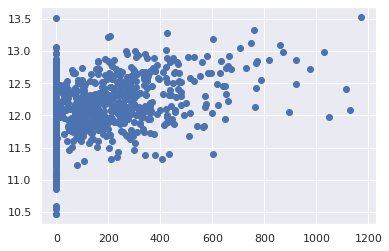

In [ ]:
train_data.drop(train_data[train_data['MasVnrArea']> 1200].index,inplace=True)
plt.scatter(train_data.MasVnrArea,train_data.SalePrice)

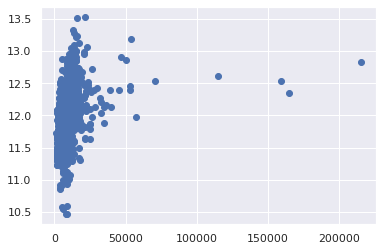

In [ ]:
plt.scatter(train_data.LotArea,train_data.SalePrice)

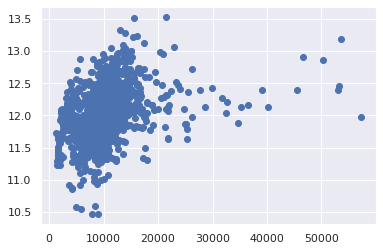

In [ ]:
train_data.drop(train_data[train_data['LotArea']> 60000].index,inplace=True)
plt.scatter(train_data.LotArea,train_data.SalePrice)

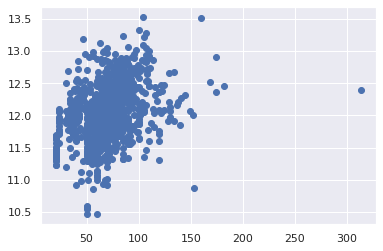

In [ ]:
plt.scatter(train_data.LotFrontage,train_data.SalePrice)

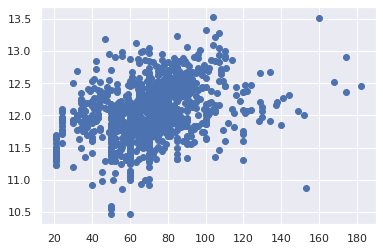

In [ ]:
train_data.drop(train_data[train_data.LotFrontage> 200].index,inplace=True)
plt.scatter(train_data.LotFrontage,train_data.SalePrice)

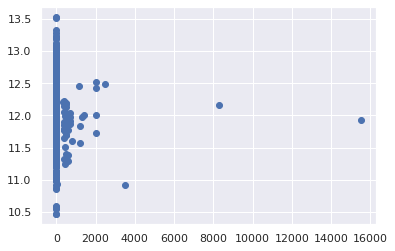

In [ ]:
plt.scatter(train_data.MiscVal,train_data.SalePrice)

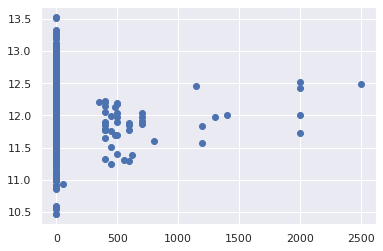

In [ ]:
train_data.drop(train_data[train_data.MiscVal> 3000].index,inplace=True)
plt.scatter(train_data.MiscVal,train_data.SalePrice)

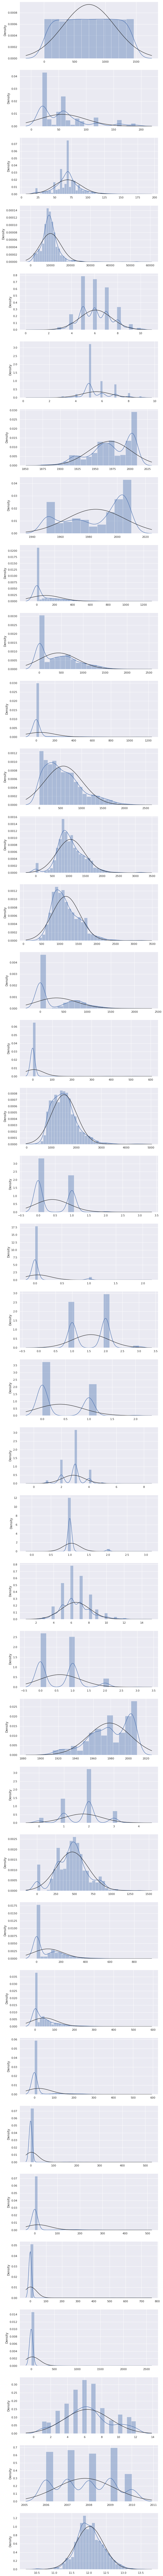

In [ ]:
sns.set()
plt.figure(figsize=(10,200))
for i ,  var in enumerate(numeric_data):
  plt.subplot(40,1,i+1)
  sns.distplot(x=train_data[var] ,fit=norm)


# Encoding part

In [ ]:
data_train = pd.get_dummies(train_data,drop_first=True)
columns = data_train.columns
data_train = pd.DataFrame(data_train, columns = columns)
data_train.shape

(1447, 236)

In [ ]:
data_test = pd.get_dummies(test_data,drop_first=True)
columns = data_test.columns
data_test = pd.DataFrame(data_test, columns = columns)
data_test.shape

(1459, 221)

In [ ]:
data_train.select_dtypes(exclude='O').count()

Id                       1447
MSSubClass               1447
LotFrontage              1447
LotArea                  1447
OverallQual              1447
OverallCond              1447
YearBuilt                1447
YearRemodAdd             1447
MasVnrArea               1447
BsmtFinSF1               1447
BsmtFinSF2               1447
BsmtUnfSF                1447
TotalBsmtSF              1447
1stFlrSF                 1447
2ndFlrSF                 1447
LowQualFinSF             1447
GrLivArea                1447
BsmtFullBath             1447
BsmtHalfBath             1447
FullBath                 1447
HalfBath                 1447
BedroomAbvGr             1447
KitchenAbvGr             1447
TotRmsAbvGrd             1447
Fireplaces               1447
GarageYrBlt              1447
GarageCars               1447
GarageArea               1447
WoodDeckSF               1447
OpenPorchSF              1447
EnclosedPorch            1447
3SsnPorch                1447
ScreenPorch              1447
PoolArea  

In [ ]:
# finding those feature which have more than 5 unique value
"""
categoric_data= train_data.select_dtypes(include="O")
categoric_data_multi_value=[]
for var in categoric_data:
  if(len(train_data[var].unique())>=6):
    print("\n ",var,": ",train_data[var].unique())
    categoric_data_multi_value.append(var)
categoric_data_multi_value
"""

'\ncategoric_data= train_data.select_dtypes(include="O")\ncategoric_data_multi_value=[]\nfor var in categoric_data:\n  if(len(train_data[var].unique())>=6):\n    print("\n ",var,": ",train_data[var].unique())\n    categoric_data_multi_value.append(var)\ncategoric_data_multi_value\n'

In [ ]:
"""
from sklearn.preprocessing import LabelEncoder
data_l_en=train_data.copy()
l_en = LabelEncoder()
for var in categoric_data_multi_value:
  data_l_en[var]=l_en.fit_transform(train_data[var])
"""

'\nfrom sklearn.preprocessing import LabelEncoder\ndata_l_en=train_data.copy()\nl_en = LabelEncoder()\nfor var in categoric_data_multi_value:\n  data_l_en[var]=l_en.fit_transform(train_data[var])\n'

# splite train data

In [ ]:
x=data_train.drop(columns='SalePrice')
y=data_train.SalePrice
x.shape,y.shape

((1447, 235), (1447,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=18)

# numerical value standerdization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

In [ ]:
inScale = RobustScaler()
outScale = RobustScaler()
X_train_scl = inScale.fit_transform(x_train)
y_train_scl = outScale.fit_transform(y_train.values.reshape(-1,1))
X_test_scl = inScale.transform(x_test)
y_test_scl = outScale.transform(y_test.values.reshape(-1, 1))

In [ ]:
scaler = StandardScaler().fit(x_train)
X_train_std_scl = scaler.transform(x_train)
X_test_std_scl = scaler.transform(x_test)


# create model

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42, objective='regression')
svr = SVR()

In [ ]:
ensemble_regressor = VotingRegressor(
    [('lr', lr), ('rf', rf), ('lgb', lgb), ('svr', svr)])

In [ ]:
for reg in (lr, rf, lgb, svr, ensemble_regressor):
    reg.fit(X_train_scl, y_train_scl)
    y_pred = reg.predict(X_test_scl)
    print(reg.__class__.__name__, mean_squared_error(y_test_scl, y_pred))

LinearRegression 0.11843479358417147
RandomForestRegressor 0.09307629150853139
LGBMRegressor 0.0690202988116462
SVR 0.4447720615333806
VotingRegressor 0.09125347402569449


In [ ]:
lr1 = LinearRegression()
rf1 = RandomForestRegressor(random_state=42)
lgb1 = LGBMRegressor(random_state=42, objective='regression')
svr1 = SVR()

In [ ]:
ensemble_regressor1 = VotingRegressor(
    [('lr', lr1), ('rf', rf1), ('lgb', lgb1), ('svr', svr1)])

In [ ]:
for reg in (lr1, rf1, lgb1, svr1, ensemble_regressor1):
    reg.fit(X_train_std_scl, y_train)
    y_pred = reg.predict(X_test_std_scl)
    print(reg.__class__.__name__, mean_squared_error(y_test, y_pred))

LinearRegression 5.268801958375328e+21
RandomForestRegressor 0.022764437121357377
LGBMRegressor 0.016879835816539075
SVR 0.03809142101667778
VotingRegressor 3.2930012239787865e+20


# hyper tuning

In [ ]:
lgb = LGBMRegressor()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100,200], 'min_child_samples':[5,10,15],'max_depth':[5,8,12,10,20],
             'learning_rate':[0.05,0.1,0.2, 0.01, 0.02, 0.03],'reg_alpha':[0,0.01,0.03], 'num_iterations': [100,200,300,400,500]}
mse = make_scorer(mean_squared_error,greater_is_better=False)
reg = GridSearchCV(lgb,parameters, scoring=mse)
reg.fit(X_train_std_scl, y_train)
print(reg.best_params_)
y_pred = reg.predict(X_test_std_scl)
print('The result is:')
print(mean_squared_error(y_test, y_pred))

NameError: ignored

# creating ANN model

In [ ]:
from tensorflow.keras.models import Sequential
#from keras.optimizers import Adam,Ada

In [ ]:
model = Sequential({
Dense(units=10,activation='relu',kernel_initializer='he_normal',input_dim=253),
Dense(units=15,activation='relu',kernel_initializer='he_normal'),
Dropout(.3),
Dense(units=1,activation='sigmoid')   
})

TypeError: ignored

In [ ]:
y_train.shape

(1157,)

# prepare submission file

In [ ]:
# standerize test data


# creating submit file 

In [ ]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice':prediction})
output.to_csv('submission.csv', index=False)
output.head()
